In [12]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [35]:
df_original = pd.read_csv("./Country-data.csv")
df_original.head()
#df_original.loc[:,'health']


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [33]:
df_original = pd.read_csv("./Country-data.csv")
df = df_original.copy()
df = df.iloc[:, 1:]
df = df.dropna()

# Min-Max Scaling
#scaler = MinMaxScaler()
#df = scaler.fit_transform(df)

# Applying the Log
df = df.apply(lambda x: np.log(x))
df = df.dropna()


/Users/ravibabariya/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,4.502029,2.302585,2.025513,3.804438,7.383989,2.244956,4.028917,1.761300,6.315358
1,2.809403,3.332205,1.879465,3.883624,9.203316,1.501853,4.334673,0.500775,8.316300
2,3.306887,3.648057,1.427916,3.446808,9.464983,2.778819,4.337291,1.061257,8.402904
3,4.779123,4.131961,1.047319,3.758872,8.682708,3.109061,4.096010,1.818077,8.169053
4,2.332144,3.817712,1.796747,4.075841,9.857444,0.364643,4.341205,0.756122,9.409191
...,...,...,...,...,...,...,...,...,...
162,3.374169,3.841601,1.658228,3.964615,7.989560,0.963174,4.143135,1.252763,7.996317
163,2.839078,3.349904,1.591274,2.867899,9.711116,3.826465,4.322807,0.904218,9.510445
164,3.148453,4.276666,1.922788,4.384524,8.409608,2.493205,4.291828,0.667829,7.177782
165,4.030695,3.401197,1.644805,3.538057,8.407378,3.161247,4.212128,1.541159,7.177782


In [25]:
clustering = DBSCAN(eps=4, min_samples=3).fit(df)

In [26]:
clustering.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0])

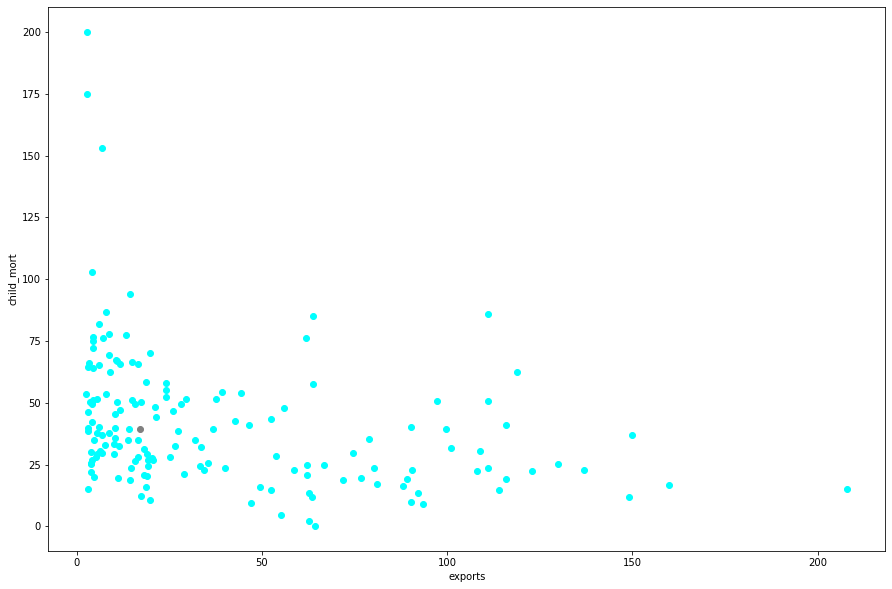

In [27]:
colors = ["cyan", "red", "yellow", "green", "blue", "purple", "pink", "olive", "orange", "red", "yellow", "green", "blue", "purple", "pink", "olive", "oragne", "cyan"]
df_values = df_original.values.tolist()

plt.figure(figsize=(15, 10))
for p, c in zip(df_values, clustering.labels_):
    if c == -1:
        color = "gray"
    else:
        color = colors[c]
    plt.scatter(p[1], p[2], color=color)
plt.ylabel("child_mort")
plt.xlabel("exports")
plt.show()

In [28]:
print(df_values)

[['Afghanistan', 90.2, 10.0, 7.58, 44.9, 1610, 9.44, 56.2, 5.82, 553], ['Albania', 16.6, 28.0, 6.55, 48.6, 9930, 4.49, 76.3, 1.65, 4090], ['Algeria', 27.3, 38.4, 4.17, 31.4, 12900, 16.1, 76.5, 2.89, 4460], ['Angola', 119.0, 62.3, 2.85, 42.9, 5900, 22.4, 60.1, 6.16, 3530], ['Antigua and Barbuda', 10.3, 45.5, 6.03, 58.9, 19100, 1.44, 76.8, 2.13, 12200], ['Argentina', 14.5, 18.9, 8.1, 16.0, 18700, 20.9, 75.8, 2.37, 10300], ['Armenia', 18.1, 20.8, 4.4, 45.3, 6700, 7.77, 73.3, 1.69, 3220], ['Australia', 4.8, 19.8, 8.73, 20.9, 41400, 1.16, 82.0, 1.93, 51900], ['Austria', 4.3, 51.3, 11.0, 47.8, 43200, 0.873, 80.5, 1.44, 46900], ['Azerbaijan', 39.2, 54.3, 5.88, 20.7, 16000, 13.8, 69.1, 1.92, 5840], ['Bahamas', 13.8, 35.0, 7.89, 43.7, 22900, -0.393, 73.8, 1.86, 28000], ['Bahrain', 8.6, 69.5, 4.97, 50.9, 41100, 7.44, 76.0, 2.16, 20700], ['Bangladesh', 49.4, 16.0, 3.52, 21.8, 2440, 7.14, 70.4, 2.33, 758], ['Barbados', 14.2, 39.5, 7.97, 48.7, 15300, 0.321, 76.7, 1.78, 16000], ['Belarus', 5.5, 51.4